In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
data = pd.read_csv('../data/2023/generated/combined_27_sets.csv')
data.head()

,Question Num,Opt-1,Opt-2,Opt-3,Opt-4,Region,Positivity
0,Q01,26.2,65.9,7.6,0.3,English,92.1
1,Q02,12.6,65.5,19.0,2.9,English,78.1
2,Q03,42.8,44.1,12.0,1.1,English,86.9
3,Q04,40.9,45.7,12.3,1.1,English,86.6
4,Q05,36.6,51.3,11.3,0.8,English,87.9


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 372843 entries, 0 to 372842
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Question Num  372843 non-null  object 
 1   Opt-1         372843 non-null  float64
 2   Opt-2         372843 non-null  float64
 3   Opt-3         372843 non-null  float64
 4   Opt-4         372843 non-null  float64
 5   Region        372843 non-null  object 
 6   Positivity    372843 non-null  float64
dtypes: float64(5), object(2)
memory usage: 19.9+ MB


In [4]:
data.describe()

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity
count,372843.000000,372843.000000,372843.000000,372843.000000,372843.000000
mean,33.142711,46.923633,15.360849,4.373289,80.066344
std,16.207746,12.445507,10.285280,5.697490,13.670168
min,-2.900000,-2.200000,-4.100000,-2.000000,0.000000
25%,21.400000,39.500000,8.100000,0.000000,72.800000
50%,31.400000,47.100000,14.100000,2.800000,82.200000
75%,42.900000,54.500000,21.100000,6.500000,90.000000
max,125.600000,103.000000,94.100000,88.900000,123.400000


In [5]:
data.loc[data['Opt-1'] > 100, 'Opt-1'] = 100
data.loc[data['Opt-2'] > 100, 'Opt-2'] = 100
data.loc[data['Opt-3'] > 100, 'Opt-3'] = 100
data.loc[data['Opt-4'] > 100, 'Opt-4'] = 100
data.loc[data['Positivity'] > 100, 'Positivity'] = 100

In [6]:
data.loc[data['Opt-1'] < 0, 'Opt-1'] = 0
data.loc[data['Opt-2'] < 0, 'Opt-2'] = 0
data.loc[data['Opt-3'] < 0, 'Opt-3'] = 0
data.loc[data['Opt-4'] < 0, 'Opt-4'] = 0
data.loc[data['Positivity'] < 0, 'Positivity'] = 0

In [7]:
data.describe()

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity
count,372843.000000,372843.000000,372843.000000,372843.000000,372843.000000
mean,33.142514,46.923624,15.361168,4.373531,80.064743
std,16.206230,12.445373,10.284774,5.697285,13.667519
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.400000,39.500000,8.100000,0.000000,72.800000
50%,31.400000,47.100000,14.100000,2.800000,82.200000
75%,42.900000,54.500000,21.100000,6.500000,90.000000
max,100.000000,100.000000,94.100000,88.900000,100.000000


In [8]:
data[['Region', 'Question Num']].describe()

,Region,Question Num
count,372843,372843
unique,2,27
top,English,Q01
freq,294732,13809


In [9]:
data['Region'].value_counts()

Region
English        294732
Non-English     78111
Name: count, dtype: int64

In [10]:
len_group = 27
index_list = np.array(data.index)
np.random.shuffle(np.reshape(index_list, (-1, len_group)))
shuffled_data = data.iloc[index_list]

In [11]:
shuffled_data['Region'].value_counts()

Region
English        294732
Non-English     78111
Name: count, dtype: int64

In [12]:
# shuffled_data.drop(columns='Question Num', inplace=True)

In [13]:
data_2 = pd.get_dummies(shuffled_data, prefix=['Region_', 'N_'], dtype=float)
data_2

,Opt-1,Opt-2,Opt-3,Opt-4,Positivity,Region__Q01,Region__Q02,Region__Q03,Region__Q04,Region__Q05,...,Region__Q20,Region__Q21,Region__Q22,Region__Q23,Region__Q24,Region__Q25,Region__Q26,Region__Q28,N__English,N__Non-English
364257,13.2,83.0,4.0,0.0,96.2,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
364258,17.1,59.9,23.0,0.0,77.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
364259,56.0,32.3,11.9,0.0,88.3,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
364260,34.9,48.1,13.2,4.0,83.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
364261,46.1,34.2,19.8,0.0,80.3,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125572,13.3,63.3,16.7,6.7,76.6,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
125573,10.0,60.0,23.3,6.7,70.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
125574,13.8,72.4,13.8,0.0,86.2,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
125575,26.7,46.7,23.3,3.3,73.4,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
data_copy = data_2.copy()
data_2.drop(columns=['Positivity'], inplace=True)
data_2['Positivity'] = data_copy['Positivity']
data_2.head()

,Opt-1,Opt-2,Opt-3,Opt-4,Region__Q01,Region__Q02,Region__Q03,Region__Q04,Region__Q05,Region__Q06,...,Region__Q21,Region__Q22,Region__Q23,Region__Q24,Region__Q25,Region__Q26,Region__Q28,N__English,N__Non-English,Positivity
364257,13.2,83.0,4.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,96.2
364258,17.1,59.9,23.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,77.0
364259,56.0,32.3,11.9,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,88.3
364260,34.9,48.1,13.2,4.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,83.0
364261,46.1,34.2,19.8,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,80.3


In [15]:
data_2.columns[3]

'Opt-4'

In [16]:
num_rows = 27
num_sets = len(data_2) // num_rows  # Calculate the number of sets
reshaped_data = data_2.values.reshape(num_sets, num_rows, 34)

# Split into training and test sets
train_data = reshaped_data[:, :26, :33]  # First 26 rows of each set as training data
test_data = reshaped_data[:, 26, :4]    # 27th row of each set as test data

X = reshaped_data[:, :26, :33]
y = reshaped_data[:, 26, :4]

X = X.reshape(-1, 26 * 33)
y = y.reshape(-1, 4) 

In [17]:
print(X.shape)
print(y.shape)

(13809, 858)
(13809, 4)


In [18]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import plot_model
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model_new = Sequential()
# model_new.add(Dense(128, input_dim=26*6, activation='relu'))
# model_new.add(Dense(128, activation='relu'))
# model_new.add(BatchNormalization())
# model_new.add(Dropout(0.2))
# model_new.add(Dense(64, activation='relu'))
# # model_new.add(Dense(64, activation='relu'))
# model_new.add(Dense(32, activation='relu'))
# model_new.add(Dense(16, activation='relu'))
# model_new.add(Dense(4, activation='linear'))
# model_new.compile(optimizer='adam', loss='mean_squared_error')


model_new = Sequential()
model_new.add(Dense(256, input_dim=26*33, activation='relu', kernel_regularizer=l2(0.001)))
model_new.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.3))
model_new.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_new.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
model_new.add(BatchNormalization())
model_new.add(Dropout(0.3))
model_new.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
model_new.add(Dense(32, activation='relu', kernel_regularizer=l2(0.001)))
model_new.add(Dense(4, activation='linear'))
model_new.compile(optimizer='adam', loss='mean_squared_error')

history_new = model_new.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))
loss_new = model_new.evaluate(X_test, y_test)

print("Test Loss:", loss_new)

c:\user_exe\00_Leeds\Dissertation\project-files\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 382.1861 - val_loss: 62.1183
Epoch 2/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 37.6219 - val_loss: 208.6609
Epoch 3/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 33.3428 - val_loss: 24.3768
Epoch 4/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 30.7730 - val_loss: 21.1415
Epoch 5/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 28.4815 - val_loss: 20.8293
Epoch 6/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 25.8245 - val_loss: 56.5631
Epoch 7/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 25.4805 - val_loss: 18.4384
Epoch 8/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 24.1931 - val_loss: 27.7713
Epoch 9/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 23.1753 - val_loss: 18.3069
Epoch 10/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 22.1967 - val_loss: 17.3693
Epoch 11/100
346/346 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 21.4620 - val_loss: 19.3022
Epoch 12/100
346/

In [39]:
# model_new.save_weights('./checkpoints/my_checkpoint')
model_new.save('../models/model_new_02.keras')
model_new.save('../models/model_new_02.h5')

In [40]:
sample_input = X_test[0].reshape(1, -1)
predicted_output = model_new.predict(sample_input)
predicted_output = np.round(predicted_output, 1)
print("Sample Input:", X_test[0])
print("Input Shape:", X_test[0].shape)
print("Predicted Output:", predicted_output[0])
print("Actual Output:", y_test[0])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step
Sample Input: [23.2 72.   2.4  2.4  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   1.   0.  22.5 52.5 22.5  2.5  0.   1.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  31.7 53.7 14.6  0.
  0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
  0.  46.3 41.5  9.8  2.4  0.   0.   0.   1.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   1.   0.  20.7 59.8 17.1  2.4  0.   0.   0.   0.
  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  25.6 58.5 15.9
  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.  

In [41]:
sample_input = X_test[2].reshape(1, -1)
predicted_output = model_new.predict(sample_input)
predicted_output = np.round(predicted_output, 1)
print("Sample Input:", X_test[2])
print("Input Shape:", X_test[2].shape)
print("Predicted Output:", predicted_output[0])
print("Actual Output:", y_test[2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Sample Input: [33.3 63.9  0.   2.8  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   1.   0.  22.2 72.2  5.6  0.   0.   1.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  30.6 61.1  8.3  0.
  0.   0.   1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   1.
  0.  47.2 33.3 19.4  0.   0.   0.   0.   1.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   1.   0.  16.7 69.4 13.9  0.   0.   0.   0.   0.
  1.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   1.   0.  31.4 62.9  5.7
  0.   0.   0.   0.   0.   0.   1.   0.   0.   0.   0.   0.   0.   0.
  0.   0.   0.   0.   0.   0.   0.   

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Absolute Error (MAE) - Train: 1.8379085696982065
Mean Squared Error (MSE) - Train: 6.346588494864193
R² Score - Train: 0.9094608988557253


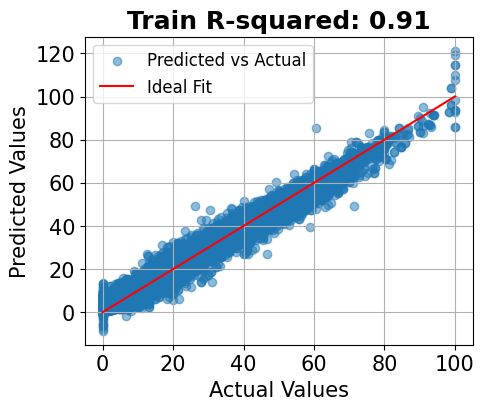

Mean Absolute Error (MAE) - Test: 2.0964733345521736
Mean Squared Error (MSE) - Test: 9.044593947973292
R² Score - Test: 0.8768548404309644


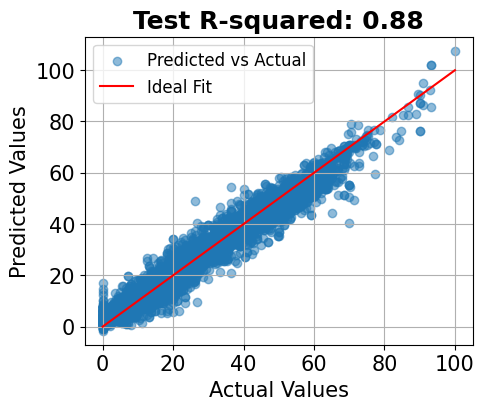

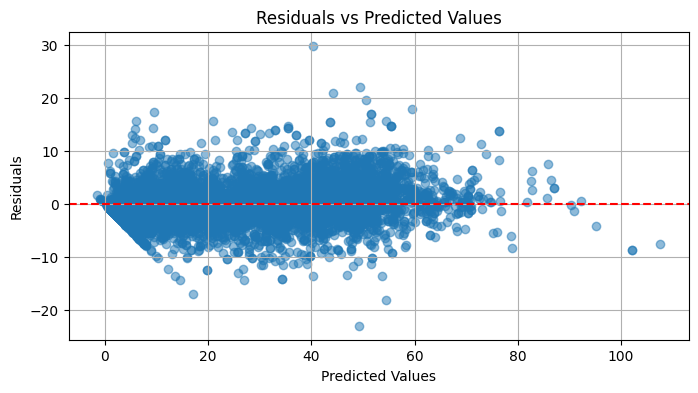

In [42]:
# Predictions
predictions = model_new.predict(X_test)
predictions_train = model_new.predict(X_train)

# Performance metrics for training data
mae_train = mean_absolute_error(y_train, predictions_train)
mse_train = mean_squared_error(y_train, predictions_train)
r2_train = r2_score(y_train, predictions_train)

# Print performance metrics for training data
print(f"Mean Absolute Error (MAE) - Train: {mae_train}")
print(f"Mean Squared Error (MSE) - Train: {mse_train}")
print(f"R² Score - Train: {r2_train}")

# Plot actual vs predicted values for training data
plt.figure(figsize=(5, 4))
plt.scatter(y_train, predictions_train, alpha=0.5, label='Predicted vs Actual')
plt.plot([np.min(y_train), np.max(y_train)], [np.min(y_train), np.max(y_train)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title(f'Train R-squared: {round(r2_train, 2)}', fontsize=18, weight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Performance metrics for test data
mae_test = mean_absolute_error(y_test, predictions)
mse_test = mean_squared_error(y_test, predictions)
r2_test = r2_score(y_test, predictions)

# Print performance metrics for test data
print(f"Mean Absolute Error (MAE) - Test: {mae_test}")
print(f"Mean Squared Error (MSE) - Test: {mse_test}")
print(f"R² Score - Test: {r2_test}")

# Plot actual vs predicted values for test data
plt.figure(figsize=(5, 4))
plt.scatter(y_test, predictions, alpha=0.5, label='Predicted vs Actual')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test), np.max(y_test)], color='red', label='Ideal Fit')
plt.xlabel('Actual Values', fontsize=15)
plt.ylabel('Predicted Values', fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.title(f'Test R-squared: {round(r2_test, 2)}', fontsize=18, weight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Plot residuals
residuals = y_test - predictions
plt.figure(figsize=(8, 4))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.grid(True)
plt.show()

dict_keys(['loss', 'val_loss'])


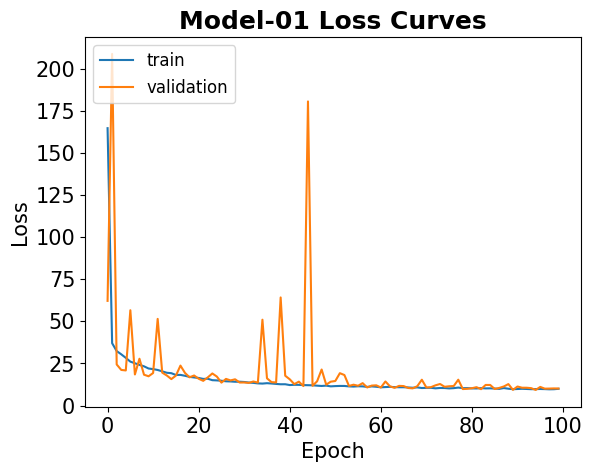

In [43]:
print(history_new.history.keys())
# summarize history for loss
plt.plot(history_new.history['loss'])
plt.plot(history_new.history['val_loss'])
plt.title('Model-01 Loss Curves', fontsize=18, weight='bold')
plt.ylabel('Loss',fontsize=15)
plt.xlabel('Epoch',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.legend(['train', 'validation'], loc='upper left', fontsize=12)
plt.show()

In [44]:
# Predictions
predictions = model_new.predict(X_test)
predictions_train = model_new.predict(X_train)

87/87 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
346/346 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [45]:
predictions_rounded = np.round(predictions, 1)

sum_predicted = np.sum(predictions_rounded[:, :2], axis=1)
test_predictions_df = pd.DataFrame(predictions_rounded, columns=[f'Test_Pred_{i}' for i in range(predictions_rounded.shape[1])])
test_predictions_df['Test_Pred'] = sum_predicted
test_predictions_df = test_predictions_df.astype('float')
test_predictions_df = test_predictions_df.round(1)

sum_predicted = np.sum(y_test[:, :2], axis=1)
test_actual_df = pd.DataFrame(y_test, columns=[f'Test_Actual_{i}' for i in range(y_test.shape[1])])
test_actual_df['Test_Actual'] = sum_predicted

In [46]:
predictions_rounded = np.round(predictions_train, 1)
sum_predicted = np.sum(predictions_rounded[:, :2], axis=1)
train_predictions_df = pd.DataFrame(predictions_rounded, columns=[f'Train_Pred_{i}' for i in range(predictions_rounded.shape[1])])
train_predictions_df['Train_Pred'] = sum_predicted
train_predictions_df = train_predictions_df.astype('float')
train_predictions_df = train_predictions_df.round(1)

sum_predicted = np.sum(y_train[:, :2], axis=1)
train_actual_df = pd.DataFrame(y_train, columns=[f'Train_Actual_{i}' for i in range(y_train.shape[1])])
train_actual_df['Train_Actual'] = sum_predicted

In [47]:
test_compare = pd.DataFrame()
test_compare['Pred'] = test_predictions_df['Test_Pred']
test_compare['Actual'] = test_actual_df['Test_Actual']
test_compare['Pred_0'] = test_predictions_df['Test_Pred_0']
test_compare['Actual_0'] = test_actual_df['Test_Actual_0']
test_compare['Pred_1'] = test_predictions_df['Test_Pred_1']
test_compare['Actual_1'] = test_actual_df['Test_Actual_1']
test_compare['Pos_Diff'] = test_compare['Pred'] - test_compare['Actual']
test_compare['0_Diff'] = test_compare['Pred_0'] - test_compare['Actual_0']
test_compare['1_Diff'] = test_compare['Pred_1'] - test_compare['Actual_1']

train_compare = pd.DataFrame()
train_compare['Pred'] = train_predictions_df['Train_Pred']
train_compare['Actual'] = train_actual_df['Train_Actual']
train_compare['Pred_0'] = train_predictions_df['Train_Pred_0']
train_compare['Actual_0'] = train_actual_df['Train_Actual_0']
train_compare['Pred_1'] = train_predictions_df['Train_Pred_1']
train_compare['Actual_1'] = train_actual_df['Train_Actual_1']
train_compare['Pos_Diff'] = train_compare['Pred'] - train_compare['Actual']
train_compare['0_Diff'] = train_compare['Pred_0'] - train_compare['Actual_0']
train_compare['1_Diff'] = train_compare['Pred_1'] - train_compare['Actual_1']

In [48]:
train_compare.head()

,Pred,Actual,Pred_0,Actual_0,Pred_1,Actual_1,Pos_Diff,0_Diff,1_Diff
0,87.1,89.1,48.7,48.7,38.4,40.4,-2.0,0.0,-2.0
1,68.4,69.8,28.5,29.9,39.9,39.9,-1.4,-1.4,0.0
2,69.3,69.9,28.5,28.4,40.8,41.5,-0.6,0.1,-0.7
3,62.0,60.7,15.8,15.2,46.2,45.5,1.3,0.6,0.7
4,80.7,80.3,23.7,23.6,57.0,56.7,0.4,0.1,0.3


In [49]:
test_compare.head()

,Pred,Actual,Pred_0,Actual_0,Pred_1,Actual_1,Pos_Diff,0_Diff,1_Diff
0,79.7,77.5,26.7,25.1,53.0,52.4,2.2,1.6,0.6
1,83.3,85.7,20.8,14.3,62.5,71.4,-2.4,6.5,-8.9
2,79.9,78.9,24.9,23.4,55.0,55.5,1.0,1.5,-0.5
3,62.0,62.5,25.6,37.5,36.4,25.0,-0.5,-11.9,11.4
4,83.9,86.3,41.3,39.5,42.6,46.8,-2.4,1.8,-4.2


In [50]:
train_compare.describe().iloc[1][6:]

Pos_Diff   -0.913651
0_Diff      0.537784
1_Diff     -1.451435
Name: mean, dtype: float64

In [51]:
test_compare.describe().iloc[1][6:]

Pos_Diff   -0.837980
0_Diff      0.610789
1_Diff     -1.448769
Name: mean, dtype: float64

In [52]:
len(X_train[3])

858

In [53]:
26 * 33

858

In [54]:
33 - 28

5

In [55]:
data_2.columns

Index(['Opt-1', 'Opt-2', 'Opt-3', 'Opt-4', 'Region__Q01', 'Region__Q02',
       'Region__Q03', 'Region__Q04', 'Region__Q05', 'Region__Q06',
       'Region__Q07', 'Region__Q08', 'Region__Q09', 'Region__Q10',
       'Region__Q11', 'Region__Q12', 'Region__Q13', 'Region__Q14',
       'Region__Q15', 'Region__Q16', 'Region__Q17', 'Region__Q18',
       'Region__Q19', 'Region__Q20', 'Region__Q21', 'Region__Q22',
       'Region__Q23', 'Region__Q24', 'Region__Q25', 'Region__Q26',
       'Region__Q28', 'N__English', 'N__Non-English', 'Positivity'],
      dtype='object')

In [56]:
data_2.columns[-1]

'Positivity'